<a href="https://colab.research.google.com/github/kariukimary/bird-species-classification/blob/main/bird_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**importing libarries and the dataset**

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model
from keras.models import Sequential
from tensorflow.keras import models,layers
from keras.layers import  Conv2D,MaxPooling2D,Dense
from PIL import Image

In [3]:
#loading the training data from the
train_data=tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    image_size=(224,224),
    shuffle=True,
    color_mode='rgb',
    batch_size=32,
    class_names=None
)

Found 3208 files belonging to 20 classes.


labels inferred meaning the labels are generated from subdirectory structure.
batch size determines how many images to be included in each batch during training.

class_names as none  is the default, meaning that TensorFlow will infer the class names from the subdirectories

label mode as categorical is used when you have multiple classes, that is describing how the images will be encoded and now that we have categorical the method of encoding will be categorical cross entropy. if the classes were two the mode could be binary which could be encoded using binary cross entropy.

shuffling the data  by defaults  it is set to True. If set to False, sorts the data in alphanumeric order, shuffling randomize the order of training examples and can help improve the model's learning

image size, its the  Size to resize images to after they are read from disk, specified as (height, width). Since the pipeline processes batches of images that must all have the same size,

In [4]:
#loading the validation data
val_data=tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/valid",
    labels="inferred",
    label_mode="categorical",
    image_size=(224,224),
    shuffle=True,
    color_mode='rgb',
    batch_size=32,
)

Found 100 files belonging to 20 classes.


In [5]:
#loading the testing data
test_data=tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/test",
    labels="inferred",
    label_mode="categorical",
    image_size=(224,224),
    shuffle=True,
    color_mode='rgb',
    batch_size=32,
)

Found 100 files belonging to 20 classes.


## **Data visualization**

converting image tensor to numpy array so that it can be comatible with  matplot library,that is the pillow and matplot libraries for visualizing the image  expect the image in numpy form for easier display and maniulation

tf.argmax() function is a TensorFlow function used to find the index of the maximum value in a tensor


**visualizing the training data**

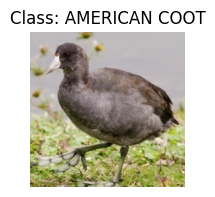

In [6]:
# Getting the first batch of data from the dataset by taking 1
for images, labels in train_data.take(1):
   # Take the first image from the batch and its corresponding label
    first_image = images[0]
    first_label = labels[0]

# Converting  the one-hot encoded label to its class index
class_index = tf.argmax(first_label).numpy()
# Displaying  the image and its class
plt.figure(figsize=(2,4))
#converting the  tensor image into numpy
plt.imshow(first_image.numpy().astype("uint8"))
if train_data.class_names:
    plt.title(f"Class: {train_data.class_names[class_index]}")
#removing the x and y axis
plt.axis("off")
plt.show()


visualizing the testing data

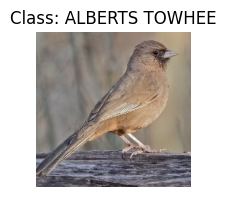

In [7]:
# Getting  the first batch of data from the dataset by taking 1
for images, labels in test_data.take(1):
   # Take the first image from the batch and its corresponding label
    first_image = images[0]
    first_label = labels[0]
# Converting the one-hot encoded label to its class index
class_index = tf.argmax(first_label).numpy()
# Displaying the image and its class
plt.figure(figsize=(2,4))
#converting the  tensor image into numpy
plt.imshow(first_image.numpy().astype("uint8"))
if train_data.class_names:
    plt.title(f"Class: {train_data.class_names[class_index]}")
#removing the x and y axis
plt.axis("off")
plt.show()


visualizing the validation data

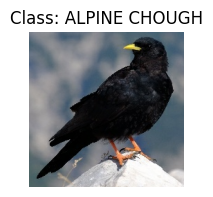

In [8]:
# Getting the first batch of data from the dataset by taking 1
for images, labels in val_data.take(1):
   # Take the first image from the batch and its corresponding label
    first_image = images[0]
    first_label = labels[0]
# Converting the one-hot encoded label to its class index
class_index = tf.argmax(first_label).numpy()
# Displaying the image and its class
plt.figure(figsize=(2,4))
#converting the  tensor image into numpy
plt.imshow(first_image.numpy().astype("uint8"))
if train_data.class_names:
    plt.title(f"Class: {train_data.class_names[class_index]}")
#removing the x and y axis
plt.axis("off")
plt.show()

## **Data preprocessing**

Data preprocessing may involve scalling the data, resizing the data  and also data augmentataion

In [9]:
#resizing and rescalling
image_size=224
rescale_resize=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size, image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [10]:
#data augmemntation
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2)
]

)

## Building the model

In [11]:
image_size=224
channel=3
batch=32
input_shape=(batch, image_size,image_size,channel)

model=models.Sequential([
    rescale_resize,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(20,activation='softmax'),
])

model.build(input_shape=input_shape)

## **Displaying trainable parameters**

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 111, 111, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 54, 54, 64)          0         
 g2D)                                                 

# model compiling

In [13]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [14]:
history=model.fit(
    train_data,
    epochs=40,
    batch_size=32,
    validation_data=val_data
)

Epoch 1/40
101/101 [==============================] - 18s 80ms/step - loss: 2.7377 - accuracy: 0.1493 - val_loss: 2.1680 - val_accuracy: 0.3000
Epoch 2/40
101/101 [==============================] - 7s 62ms/step - loss: 2.0668 - accuracy: 0.3295 - val_loss: 1.9690 - val_accuracy: 0.3100
Epoch 3/40
101/101 [==============================] - 8s 75ms/step - loss: 1.8401 - accuracy: 0.4037 - val_loss: 1.6304 - val_accuracy: 0.4400
Epoch 4/40
101/101 [==============================] - 6s 60ms/step - loss: 1.6971 - accuracy: 0.4557 - val_loss: 1.4293 - val_accuracy: 0.5200
Epoch 5/40
101/101 [==============================] - 8s 75ms/step - loss: 1.5681 - accuracy: 0.4969 - val_loss: 1.4972 - val_accuracy: 0.4800
Epoch 6/40
101/101 [==============================] - 7s 61ms/step - loss: 1.4468 - accuracy: 0.5430 - val_loss: 1.3333 - val_accuracy: 0.5700
Epoch 7/40
101/101 [==============================] - 8s 75ms/step - loss: 1.3922 - accuracy: 0.5471 - val_loss: 1.2998 - val_accuracy: 0.560

In [16]:
#this shows what the training history entails
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Testing the model

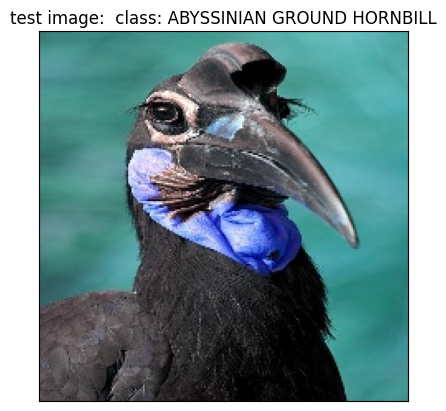

In [29]:
import cv2
import os

image_path='/content/drive/MyDrive/test/ABYSSINIAN GROUND HORNBILL/2.jpg'
img=cv2.imread(image_path)
plt.imshow(img)
plt.title(f'test image:  class: {os.path.basename(os.path.dirname(image_path))}')
plt.xticks([])
plt.yticks([])
plt.show()

# visualization of accuracy and the validation

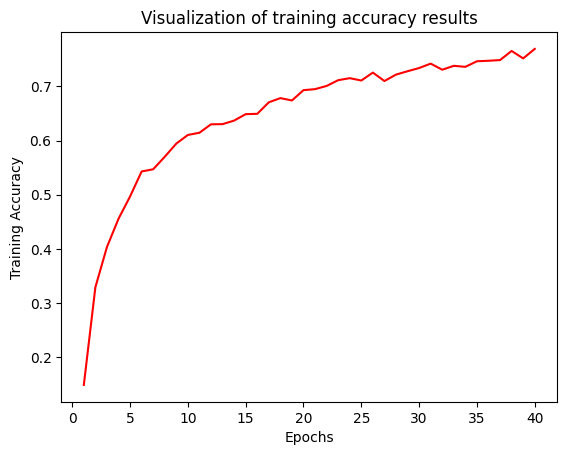

In [30]:
epochs=[i for i in range(1,41)]
plt.plot(epochs,history.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of training accuracy results')
plt.show()

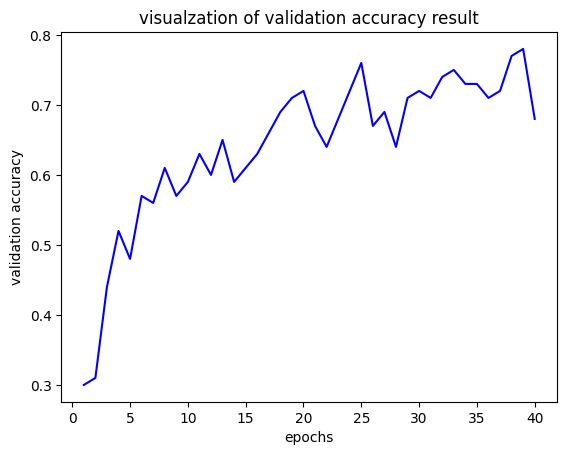

In [31]:
plt.plot(epochs,history.history['val_accuracy'],color='blue')
plt.xlabel('epochs')
plt.ylabel('validation accuracy')
plt.title('visualzation of validation accuracy result')
plt.show()